# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |

# Wavelet

An extension of Fourier analysis to signals whose forms change in time. Used widely in brain waves,
stock-marcket trends, gravitational waves, and compression of photographic images.

## Nonstationary Signals
\begin{equation}
y(t)=\begin{cases} sin 2\pi t, \quad for \, 0\leq t\leq 2\\
5 sin 2\pi t+10 sin 4\pi t ,\quad for \, 2\leq t\leq 8\\
2.5 sin 2\pi t+6 sin 4\pi t+10sin 6 \pi t ,\quad for \, 8\leq t\leq 12\\
\end{cases}
\end{equation}

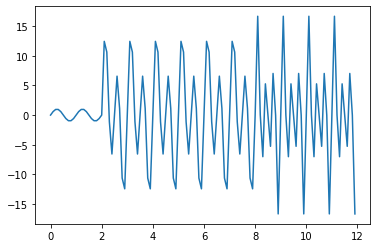

In [3]:
import matplotlib.pyplot as plt
from numpy import *

def func(t):
    if(0<=t and t<=2):
        y=sin(2.*pi*t)
    if(2<=t and t<=8):
        y=5.*sin(2.*pi*t)+10.*sin(4.*pi*t)
    if(8<=t and t<=12):
        y=2.5*sin(2.*pi*t)+6.*sin(4.*pi*t)+10.*sin(6.*pi*t)
    if (t<0 or t>12):
        y=0
    return y
        
t=arange(0,12,0.1)
y=zeros(len(t))
for idx in range(len(t)):
    y[idx]=func(t[idx])

plt.plot(t,y)
plt.show()
#we can see the difference in the sine waves

## The Discrete Fourier Transform:

In practice, we only have a finite number measurements. We can use these values to do Fourier transform,
and construct the signal for any value of the time. In this way, DFT is a technique for interpolating, 
compressing, and extrapolating the signal. 

We assume the signal y(t) is sampled at (N+1) discrete times with a constant spacing $\Delta$t=h between them. 
\begin{eqnarray}
y_{k}&=&y(t_{k}),\quad k=0,1,2,...,N\\
t_{k}&=&k h,\quad h=\Delta t
\end{eqnarray}
The total time to sample the data is thus T=Nh. When we choose the period T to sample the data, we implicitly assume that y(t+T)=y(t), and thus $y_{0}=y_{N}$.

The time interval T is the largest time over which we measure y(t). It determines the lowest frequency 
\begin{equation}
\omega_{1}=\frac{2\pi}{T}
\end{equation}
The full range of frequencies is thus
\begin{equation}
\omega_{n}=n\omega_{1}\quad n=0,1,...,N
\end{equation}
n=0 is the part of the siginal that does not oscillate. 

DFT follows from two approximations. First we evaluate the integral from time 0 to time T, instead of $-\infty$ to $\infty$. Second, the trapezoid rule is used for the integration
\begin{eqnarray}
Y(\omega_{n})&=&\int_{-\infty}^{\infty}dt y(t)\frac{e^{-i\omega t}}{\sqrt{2\pi}}\sim\int_{0}^{T}dt y(t)\frac{e^{-i\omega_{n}t}}{\sqrt{2\pi}}\\
&=&\sum_{k=1}^{N}h y(t_{k})\frac{e^{-i\omega_{n}t_{k}}}{\sqrt{2\pi}}=h \sum_{k=1}^{N} y_{k}\frac{e^{-i n 2\pi k /N }}{\sqrt{2\pi}}
\end{eqnarray}

Two notes:

1) $\omega = n 2\pi /T = n 2\pi / (N *h)$

2) You can prove that $Y(2\pi N/T-\omega_{n})=Y(\omega_n)$
\begin{equation}
e^{-i(2\pi N/T - \omega_n) t_{k}}=e^{-i 2\pi N/T t_k }*e^{- \omega_n t_{k}}=e^{-i 2\pi/h *k*h }*e^{- \omega_n t_{k}}
\end{equation}

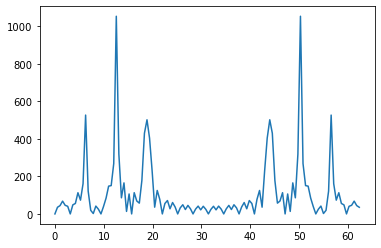

In [2]:
# Fourier analysis

N=len(t)
dftz=zeros(N,complex )
nplot=zeros(N)
fplot=zeros(N)
step = 0.1

def fourier(signal):                                              # DFT
    for n in range(0, N):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, 2.*pi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sqrt(2.*pi)      
      nplot[n] = n/N/step*2.*pi        # omega = n 2\pi /T = n 2\pi / (N *step)
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
    
fourier(y)

plt.plot(nplot,fplot)
plt.show()

## Wavelet

Fourier transform get all the frequencies simultaneously but it does not
contain time resolution information indicating when each frequency occurs. 
Second, all Fourier components are correlated (overtomes extend over all times
with a constant amplitude. Even 0 is splitted into all Fourier components), 
which means we have stored
more information than necessary. 

The idea behind wavelet analysis is to expand a signal in a complete set of functions (wavelets),
each of which oscillates for a finite period of time, and each of which is centered
at a different time. 

Let's see four sample wavelets:

1) the oscillating Gaussians (Morlet wavelet)
\begin{equation}
\Phi(t)=e^{2\pi i t}e^{-t^2/2\sigma^2}
\end{equation}

![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_2a.png)

2) the second derivative of a Gaussian (Mexican hat)
\begin{equation}
\Phi(t)=-\sigma^2\frac{d^2}{dt^2} e^{-t^2/2\sigma^2}=(1-\frac{t^2}{\sigma^2})e^{-t^2/2\sigma^2}
\end{equation}


![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_2b.png)

3) An up-and-down step function

![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_2c.png)

4) A fractal shape
![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_2d.png)

Wavelets are localized in both time and frequency. They are large for just a limited time and
contain a limited range of frequency. 

Let's Fourier transform these wavelet to prove uncertainty principle

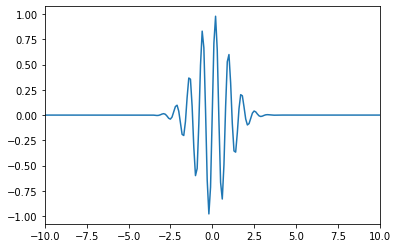

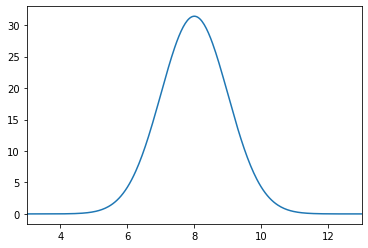

In [5]:
# Please try different wavelent functions to prove uncertainty principle

import matplotlib.pyplot as plt
from numpy import *

def func(t):
    return func3(t)

# sin wavelet within a time interval
def func1(t):
    if(abs(t)<6.*pi/5.):
        return sin(5.*t)
    else:
        return 0

# gaussian function
def func2(t):
    y = exp(-t*t/2.)
    return y

# Morlet wavelet
def func3(t):
    y=sin(8.*t)*exp(-t*t/2.)
    return y
    
    
# Mexican hat wavelet
def func4(t):
    sig=1.
    y=(1-t*t/sig/sig)*exp(-t*t/sig/sig/2.)
    return y
    

step=0.1
t=arange(-100.,100.,step)

N=len(t)
y=zeros(N)
dftz=zeros(N,complex )
nplot=zeros(N)
fplot=zeros(N)
for idx in range(len(t)):
    y[idx]=func(t[idx])

    
fig = plt.figure() 
plt.plot(t,y)
plt.xlim([-10.,10.])
plt.show()

def fourier(signal):                                              # DFT
    for n in range(0, N):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, 2.*pi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sqrt(2.*pi)      
      nplot[n] = n/N/step*2.*pi # the unit of \omega, cos(\omega t)
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
    
fourier(y)
fig = plt.figure() 
plt.plot(nplot,fplot)
plt.xlim([3,13.])
plt.show()

## The Wavelet Transform

The wavelet transform of a time signal y(t) is defined as
\begin{equation}
Y(s,\tau)=\int_{-\infty}^{\infty}dt \psi^*_{s,\tau}(t)y(t)
\end{equation}
with s=2$\pi/\omega$

The standard way to generate a family of wavelet basis starts with 
$\phi(t)$, called a mother function or an analyzing function. Note that
t is real. We can use this function to generate daughter wavelets. 

For example, the mother wavelet
\begin{equation}
\Psi(t)=sin(8*t)e^{-t^2/2}
\end{equation}
We can scale, translate, and normalize this mother wavelet
\begin{equation}
\psi_{s,\tau}(t)\equiv \frac{1}{\sqrt{s}}\Psi(\frac{t-\tau}{s})=\frac{1}{\sqrt{s}}sin\left[\frac{8(t-\tau)}{s}\right]e^{-(t-\tau)^2/2s^2}
\end{equation}
The three daughter wavelets are:
![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_4a.png)
![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_4b.png)
![textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig13_4c.png)

Using daughter wavelets, the wave transform and its inverse transform are
\begin{eqnarray}
Y(s,\tau)=\frac{1}{\sqrt{s}}\int_{-\infty}^{\infty}dt \Psi^*(\frac{t-\tau}{s})y(t)\quad (wavelet \, transform)\\
y(t)=\frac{1}{C}\int_{-\infty}^{\infty}d\tau \int_{0}^{\infty}ds \frac{\psi_{s,\tau}(t)}{s^{2}}Y(s,\tau)\quad  (Inverse \, Transform)\\
\end{eqnarray}
where C depends on the wavelet used.  The wavelet transform got a function of
the time scale s (frequency 2$\pi$/s) and window location $\tau$.

The general requirements for a mother wavelet $\Psi$ are
* $\Psi(t)$ is real
* $\Psi(t)$ oscillates around zero such that its average is zero
* $\Psi(t)$ is local.
* The trasforms of low powers of t vanish
\begin{equation}
\int_{-\infty}^{\infty}t^0\Psi(t)dt=\int_{-\infty}^{\infty}t^1\Psi(t)dt=...=\int_{-\infty}^{\infty}t^{p-1}\Psi(t)dt=0
\end{equation}

In [18]:
# Transform  sin(2*pi*t) and the signal given in the beginning (use Morlet wavelet)

import matplotlib.pyplot as plt
from numpy import *
 
ns=50
ntau=80
dstep=2./ns
sar=arange(0.001,2.001,dstep)
dtaustep=15./ntau
tauar=arange(0.,15.,dtaustep)
ystau=zeros((ns, ntau),complex) #for final transform

nt=200
dtstep=12./nt
tar=arange(0.,12.,dtstep)

def func(t):
    return func2(t)

def func2(t): #original signal
    y=0.
    if(0<=t and t<=2):
        y=sin(2.*pi*t)
    if(2<=t and t<=8):
        y=5.*sin(2.*pi*t)+10.*sin(4.*pi*t)
    if(8<=t and t<=12):
        y=2.5*sin(2.*pi*t)+6.*sin(4.*pi*t)+10.*sin(6.*pi*t)
    return y

# sin(2 \pi t)
def func1(t): 
    return(sin(2.*pi*t))

def morlet(t,sigma): #mother Morlet function
    #sigma is how fast it decreases, here we just have it as 1
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext]) # y(t) for all t_i
    for idexs in range(ns):
        for idextau in range(ntau):
            for idext in range(nt):   # For each s and tau, integrate t for the wavelet transform
               ystau[idexs,idextau] = 1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep
            # please finish this line using "conjugate(morlet((tar[idext]-tauar[idextau])/sar[idexs],1.))" as the wavelet
wavelet()

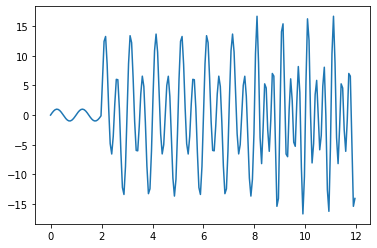

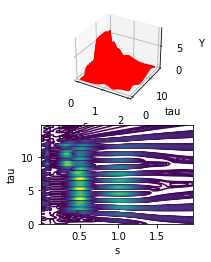

In [19]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).imag, levels=levels)
p.xlabel('s')
p.ylabel('tau')
p.show()
p.show()  

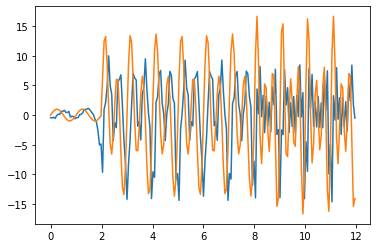

In [20]:
# reconstruct the origional signal

yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,idextau]*dstep*dtaustep

invwavelet(yarr2)
p.plot(tar,yarr2.imag)
p.plot(tar,yarr)
p.show()

#invwavelet(yarr2)
#p.plot(tar,yarr2.imag)
#p.plot(tar,yarr)
#p.show()

'''
this is our transform back to original
looks kinda back, maybe because a lot of noise
somethings not quite right'''

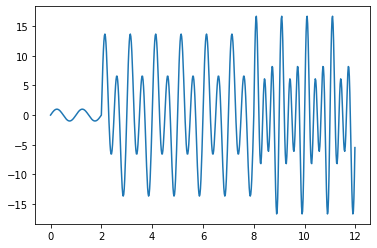

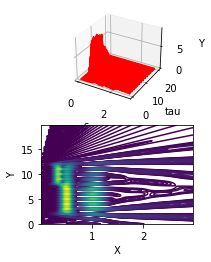

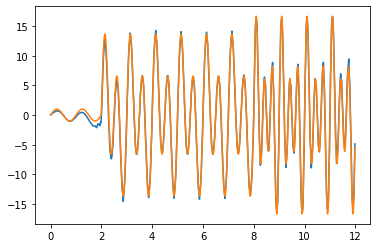

In [21]:
# The same task but only use the imagninary part of the wavelet 

'''
wavelet transform we can use either the real or the imaginary part
'''

import matplotlib.pyplot as plt
from numpy import *
 
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=600
dtstep=12./nt
tar=arange(0.,12.,dtstep)

def func(t):
    return func2(t)

def func2(t):
    y=0.
    if(0<=t and t<=2):
        y=sin(2.*pi*t)
    if(2<=t and t<=8):
        y=5.*sin(2.*pi*t)+10.*sin(4.*pi*t)
    if(8<=t and t<=12):
        y=2.5*sin(2.*pi*t)+6.*sin(4.*pi*t)+10.*sin(6.*pi*t)
    return y

def func1(t):
    return(sin(2.*pi*t))

def morlet(t,sigma):
#    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    psi=sin(2.*pi*t)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep

wavelet()

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).real, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()
p.show()  

yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,idextau]*dstep*dtaustep

invwavelet(yarr2)
p.plot(tar,yarr2.real*2.2)
p.plot(tar,yarr)
p.show()

working, finding transform, count 20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
transform found
normalize
finding inverse transform
count to 10
1
2
3
4
5
6
7
8
9
10


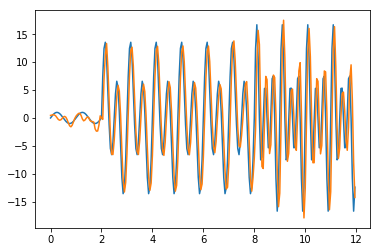

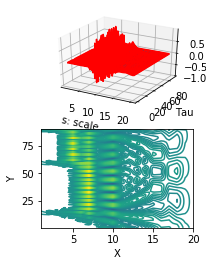

Done


In [19]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# CWT.py  Continuous Wavelet TF. Based on program by Zlatko Dimcovic 
												
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *


iT =  0.0;          fT =  12.0;         W = fT - iT;
N =  240;           h =  W/N
noPtsSig =  N;      noS =  20;          noTau =  90;
iTau =  0.;         iS =  0.1;          tau =  iTau;        s =  iS                
            
# Need *very* small s steps for high frequency;
dTau =  W/noTau;    dS =  (W/iS)**(1./noS);
maxY =  0.001;      sig =  zeros((noPtsSig), float)              # Signal
      

    
def signal(noPtsSig, y):                                # Signal function
    tar=array([])
    yyar=array([])
    t = 0.0;     hs = W/noPtsSig;     t1 = W/6.;    t2 = 4.*W/6.
    for i in range(0, noPtsSig):  
        if  t >= iT  and t <=  t1:  y[i] =  sin(2*pi*t)
        elif t >= t1 and t <=  t2: y[i] = 5.*sin(2*pi*t) + 10.*sin(4*pi*t);
        elif t >= t2 and t <=  fT: 
             y[i] = 2.5*sin(2*pi*t) + 6.*sin(4*pi*t) + 10.*sin(6*pi*t)
        else: 
            print("In signal(...) : t out of range.")
            sys.exit(1)
#        y[i] = sin(2*pi*t)
        yy=y[i]
        tar=append(tar,t)
        yyar=append(yyar,yy)
        t += hs  
    p.plot(tar,yyar)
        
signal(noPtsSig, sig)                                       # Form signal
Yn =  zeros( (noS+1, noTau+1), float)                       # Transform

def morlet(t, s, tau):                                      # Mother  
     T =  (t - tau)/s
     return sin(8*T) * exp( - T*T/2. )
	
def transform(s, tau, sig):                            # Find wavelet TF
    integral = 0.
    t = iT;                                                     
    for i in range(0, len(sig) ):
         t += h
         integral += sig[i]*morlet(t, s, tau)*h
    return integral / sqrt(s)
          
def invTransform(t, Yn):                                # Compute inverse
    s = iS                                                    # Transform
    tau = iTau                             
    recSig_t = 0                 
    for i in range (0, noS):
        s *= dS                                              # Scale graph
        tau = iTau     
        for j in range (0, noTau):
            tau += dTau                 
            recSig_t += dTau*dS *(s**(-1.5))* Yn[i,j] * morlet(t,s,tau)
    return recSig_t

print("working, finding transform, count 20")
for i in range( 0, noS):
    s *= dS                                                 # Scaling
    tau = iT
    print(i)
    for j in range(0, noTau):
         tau += dTau                                      # Translate
         Yn[i, j] = transform(s, tau, sig)
         
print("transform found")  
for i in range( 0, noS):
    for j in range( 0, noTau):
        if Yn[i, j] > maxY or Yn[i, j] < - 1 *maxY :
            maxY = abs( Yn[i, j] )                      # Find max Y       
tau =  iT
s =  iS
print("normalize")      
for i in range( 0, noS):
     s *= dS                             
     for j in range( 0, noTau):
         tau +=   dTau                                        # Transform
         Yn[i, j] = Yn[i, j]/maxY
     tau = iT
print("finding inverse transform")                           # Inverse TF
recSigData =  "recSig.dat"                   
recSig =  zeros(len(sig) )                                   
t =  0.0;
print("count to 10")
kco = 0;            j = 0;              Yinv =  Yn         
xxar=array([])
yyar2=array([])
for rs in range(0, len(recSig) ):                     
    recSig[rs] = invTransform(t, Yinv)          # Find input signal
    xx=rs/20
    yy=4.6*recSig[rs]
    xxar=append(xxar,xx)
    yyar2=append(yyar2,yy)
    t += h 
    if kco %24 == 0:
        j += 1
        print(j)                            
    kco += 1    
p.plot(xxar,yyar2)
x = list(range(1, noS + 1))                             
y = list(range(1, noTau + 1))                                         
X,Y = p.meshgrid(x, y)                                    

def functz(Yn):                                # Transform function
    z = Yn[X, Y]    
    return z
                
Z = functz(Yn)                                               
fig = p.figure()                                              
#ax = Axes3D(fig)      
ax = fig.add_subplot(2,2,1,projection='3d')
ax.plot_surface(X, Y, Z)  
ax.plot_wireframe(X, Y, Z, color = 'r')          
ax.set_xlabel('s: scale')                                         
ax.set_ylabel('Tau')
ax.set_zlabel('Transform')
ax = fig.add_subplot(2,2,3)
levels=p.arange(Z.min(),Z.max(),(Z.max() - Z.min())/100.)
CS=p.contour(x,y,Z, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()

print("Done")                                   

# Homework

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)


In [ ]:
'''
signal gets faster and faster as t increases
look online to see if we can get the same expected figure
gravitational wave  chirp google
now the x axis is time and y is frequency so this needs to be 
converted'''